In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt
import numpy as np

In [2]:
#Parâmetros do MGE

M0 = np.array([3.7, 4.6, 5.3, 9.8, 13, 15.4, 26])
sigma0 = np.array([1.9, 2.7, 2.3, 13.9, 11.4, 5.7, 7.0])
q0 = np.array([0.3, 0.74, 0.53, 0.52, 0.56, 0.16, 0.23])


In [3]:
image_plane_grid = al.Grid.uniform(shape_2d=(50, 50), pixel_scales=0.05, sub_size=1)

In [4]:
mass_profile = al.mp.MGE(centre=(0.0, 0.0), einstein_radius=1.6)
mass_profile.MGE_comps(M=M0, sigma=sigma0, q=q0)


lens_galaxy = al.Galaxy(redshift=0.5, mass=mass_profile)

light_profile = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)

source_galaxy = al.Galaxy(redshift=1.0, light=light_profile)

In [5]:
image_plane = al.Plane(galaxies=[lens_galaxy])
source_plane = al.Plane(galaxies=[source_galaxy])
source_plane_grid = image_plane.traced_grid_from_grid(grid=image_plane_grid)

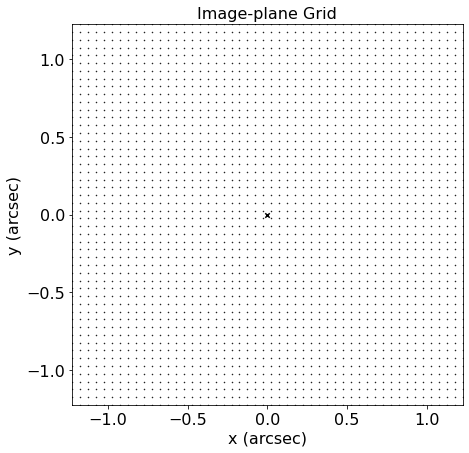

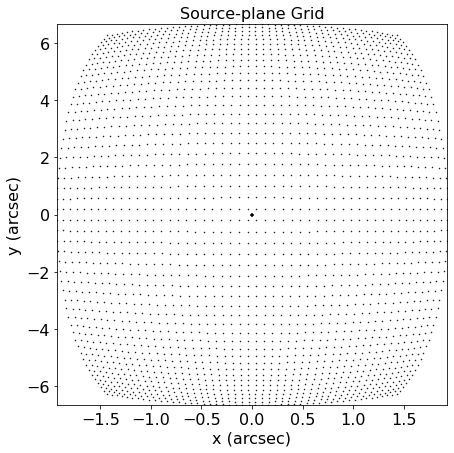

In [6]:
aplt.Plane.plane_grid(
    plane=image_plane,
    grid=image_plane_grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Image-plane Grid")),
)

aplt.Plane.plane_grid(
    plane=source_plane,
    grid=source_plane_grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Source-plane Grid")),
)

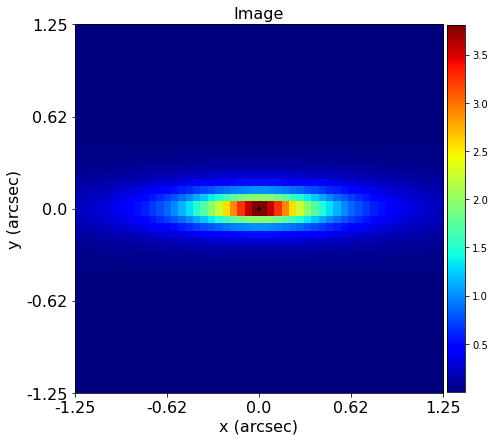

In [7]:
aplt.Plane.image(plane=source_plane, grid=source_plane_grid)

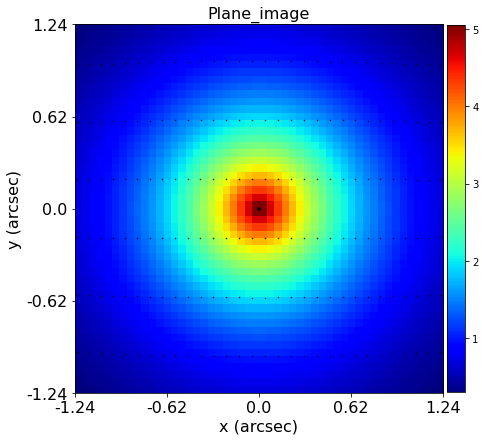

In [8]:
aplt.Plane.plane_image(
    plane=source_plane, grid=source_plane_grid, include=aplt.Include(grid=True)
)
